In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from statsmodels.tsa.stattools import adfuller
from numpy import log

In [2]:
data = pd.read_excel("./Tobacco.xlsx",parse_dates = True)
data

,Years,Sales
0,1950-01,15.55
1,1951-01,17.21
2,1952-01,14.83
3,1953-01,16.89
4,1954-01,17.60
...,...,...
67,2017-01,105.00
68,2018-01,104.45
69,2019-01,105.00
70,2020-01,110.00


In [3]:
# We now convert this data into a time series data. Currently the date values are stored as string type.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Years   72 non-null     object 
 1   Sales   72 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.2+ KB


In [4]:
data.isnull().any()

Years    False
Sales    False
dtype: bool

In [5]:
data.columns

Index(['Years', 'Sales'], dtype='object')

In [6]:
data = data.fillna(data.mean())

C:\Users\piyus\AppData\Local\Temp\ipykernel_8484\476127175.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = data.fillna(data.mean())


In [7]:
data.head()

,Years,Sales
0,1950-01,15.55
1,1951-01,17.21
2,1952-01,14.83
3,1953-01,16.89
4,1954-01,17.60


In [8]:
data.describe()

,Sales
count,72.000000
mean,54.162944
std,31.561175
min,10.040000
25%,25.592500
50%,47.735000
75%,85.282500
max,111.560000


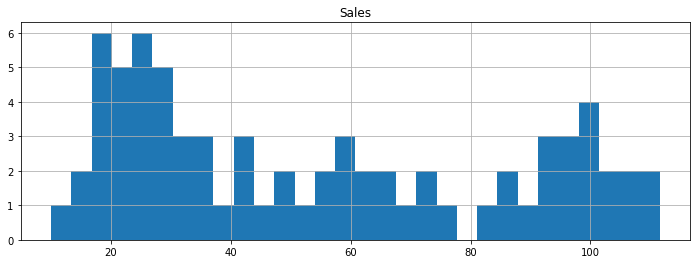

In [9]:
data.hist(bins = 30 , figsize=(12,4))
plt.show()

<AxesSubplot:>

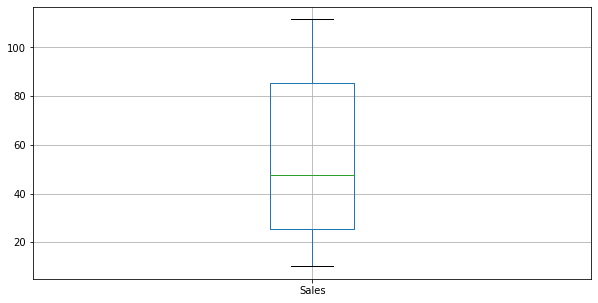

In [10]:
data.boxplot(figsize=(10,5))

<AxesSubplot:xlabel='Years', ylabel='Sales'>

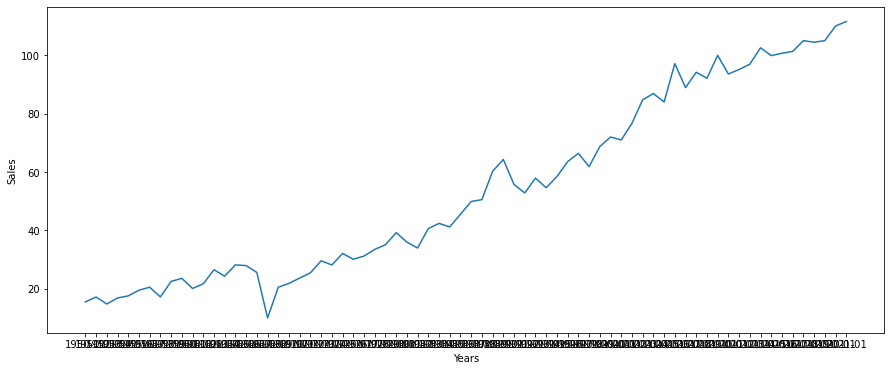

In [11]:
sns.lineplot(data = data , x = 'Years' , y = 'Sales')

<AxesSubplot:>

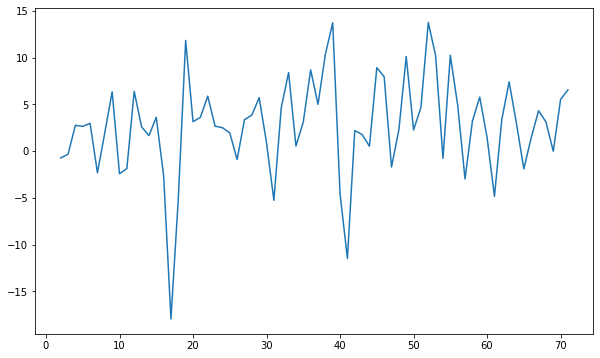

In [12]:
data.Sales.diff(2).plot(figsize=(10, 6))

In [13]:
!pip install pmdarima

from pmdarima import auto_arima

import warnings
warnings.filterwarnings("ignore")

stepwise_fit = auto_arima(data['Sales'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)  

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.37 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=407.946, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=363.325, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.27 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=403.672, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=364.235, Time=0.17 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=363.985, Time=0.16 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.21 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=365.854, Time=0.40 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=369.975, Time=0.04 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=363.003, Time=0.08 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=400.748, Time=0.03 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=364.793, Time=0.21 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=364.724, Time=0.17 sec
 ARIMA(2,1,0)(0,1,1)[12]             : AIC=in

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   72
Model:             SARIMAX(2, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -177.501
Date:                            Mon, 18 Jul 2022   AIC                            363.003
Time:                                    10:15:08   BIC                            371.313
Sample:                                         0   HQIC                           366.247
                                             - 72                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4428      0.132     -3.354      0.001      -0.702      -0.184
ar.L2         -0.1975      0.153     -1.290      0.197      -0.497       0.102
ar.S.L12      -0.7340      0.072    -10.167      0.000      -0.875      -0.592
sigma2        20.4485      3.347      6.109      0.000      13.888      27.009
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 6.84
Prob(Q):                              0.85   Prob(JB):                         0.03
Heteroskedasticity (H):               1.97   Skew:                            -0.04
Prob(H) (two-sided):                  0.14   Kurtosis:                         4.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
train = data.iloc[:11]
test = data.iloc[11:]

from statsmodels.tsa.statespace.sarimax import SARIMAX
  
model = SARIMAX(train['Sales'], 
                order = (0, 1, 1), 
                seasonal_order =(0, 1, 0, 12))
  
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Sales   No. Observations:                   11
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 12)   Log Likelihood                   0.000
Date:                             Mon, 18 Jul 2022   AIC                              4.000
Time:                                     10:15:08   BIC                                nan
Sample:                                          0   HQIC                               nan
                                              - 11                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1               0         -0        nan        nan           0           0
sigma2         1.0000         -0       -inf      0.000       1.000       1.000
===================================================================================
Ljung-Box (L1) (Q):                    nan   Jarque-Bera (JB):                  nan
Prob(Q):                               nan   Prob(JB):                          nan
Heteroskedasticity (H):                nan   Skew:                              nan
Prob(H) (two-sided):                   nan   Kurtosis:                          nan
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

<AxesSubplot:>

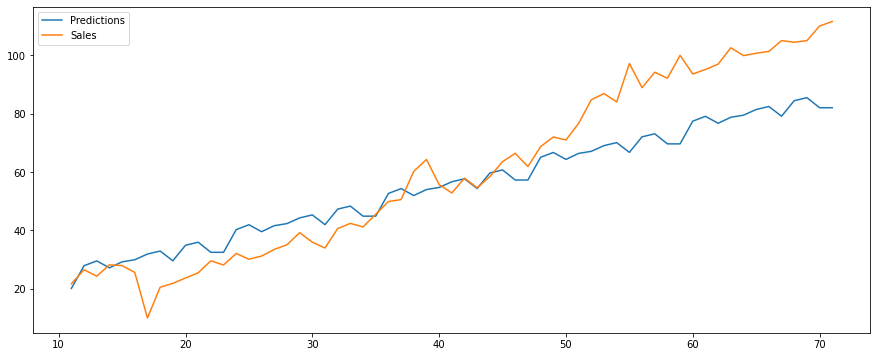

In [15]:
start = len(train)
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
predictions.plot(legend = True)
test['Sales'].plot(legend = True)
